In [95]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
from sqlalchemy.dialects.mssql.information_schema import columns

In [96]:
# Function to pull data from MongoDB and convert it to DataFrames
def pulling_data_db():
    # Connect to MongoDB
    client = MongoClient('localhost', 27017)
    db = client['financeStockData']

    collection = db['AAPL_stock_data']
    
    # Fetch all documents from each collection
    dt1 = list(collection.find())     # Convert cursor to list for DataFrame
 
    # Convert list of documents (dictionaries) to pandas DataFrames
    appl_data = pd.DataFrame(dt1)
    
    return appl_data # tesl_fin, goo_fin

In [97]:
fin_data = pulling_data_db()
fin_data.head()

In [98]:
fin_data.info()

In [99]:
fin_data = fin_data[["Date", "Adj Close"]]
fin_data.plot(kind='line')

In [100]:
# Step 2: Ensure the index is a DatetimeIndex
fin_data.index = pd.to_datetime(fin_data.index)

In [101]:
# resampling to bi-weekly 
weekly_price = fin_data['Adj Close'].resample('W').mean()
monthly_price = fin_data['Adj Close'].resample('M').mean()
daily_price = fin_data['Adj Close'].resample('D').mean()

print(f"Weekly average price of stock is {weekly_price}")
print(f"Monthly average price of stock is {monthly_price}")
print(f"Daily average price of stock is {daily_price}")

In [102]:
fin_data['Date'] = pd.to_datetime(fin_data['Date'])
fin_data['month'] = fin_data['Date'].dt.month
fin_data['day'] = fin_data['Date'].dt.day
fin_data['year'] = fin_data['Date'].dt.year
fin_data.head()

In [103]:
fin_data = fin_data.drop(columns = ['Date'], axis =1)
fin_data.head()

In [104]:
fin_data.duplicated().sum()

In [105]:
fin_data['Adj Close'].describe()

In [106]:
df = fin_data.values.flatten()

In [107]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):

    print('Results of Dickey-Fuller Test:')
    adf_test_result = adfuller(timeseries, autolag='AIC')
    
    adf_output = pd.Series(adf_test_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test_result[4].items():
        adf_output['Critical Value (%s)' % key] = value
    
    print(adf_output)

    # Interpret the p-value
    if adf_output['p-value'] < 0.05:
        print("\nConclusion: Reject the null hypothesis. The time series is stationary.")
    else:
        print("\nConclusion: Cannot reject the null hypothesis. The time series is non-stationary.")


In [108]:
adf_test(df)

In [109]:
season_length = 1
df_diff = df.diff(periods=season_length).dropna()  # Adjust season_length accordingly
df_diff

<Axes: >

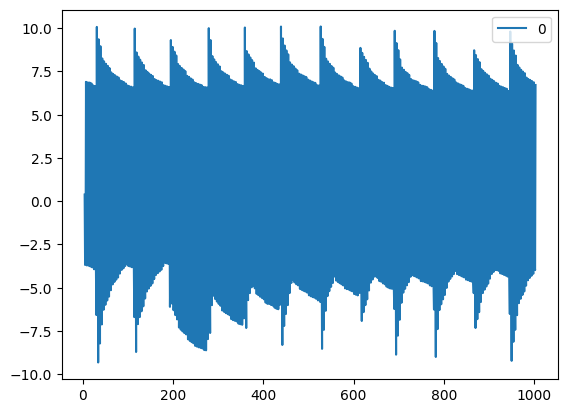

In [56]:
# df = pd.DataFrame(df_diff)
df_diff.plot(kind="line")

In [57]:
adf_test(df_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.249905e+01
p-value                        2.833255e-23
#Lags Used                     2.100000e+01
Number of Observations Used    9.780000e+02
Critical Value (1%)           -3.437054e+00
Critical Value (5%)           -2.864500e+00
Critical Value (10%)          -2.568346e+00
dtype: float64

Conclusion: Reject the null hypothesis. The time series is stationary.


In [73]:
df_smoothed = df_diff.rolling(window=2).mean()  # Adjust window size
df_smoothed.dropna(inplace=True)


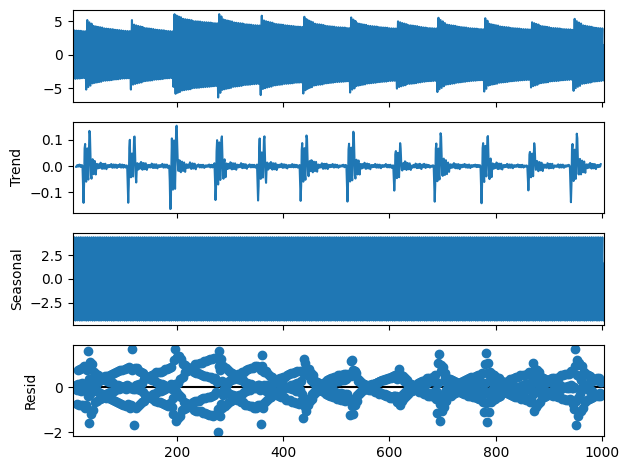

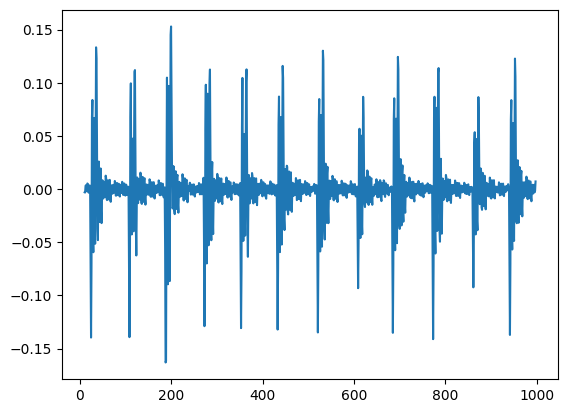

In [78]:
# Checking for trend in the time series data
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(df_smoothed, model='additive', period=12)  # Adjust 'period'

# Plot the decomposed components
decomposition.plot()
plt.show()

# Access the trend component
trend = decomposition.trend
plt.plot(trend)
plt.show()


<Axes: >

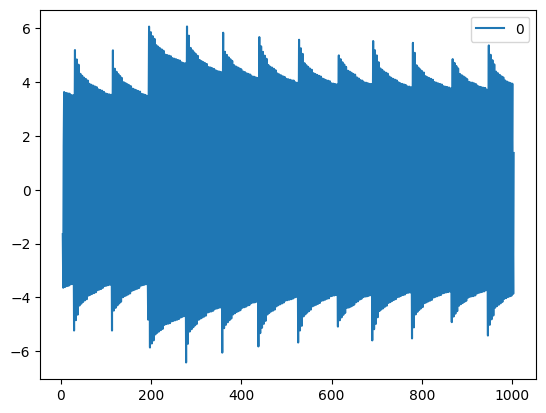

In [77]:
df_smoothed.plot(kind='line')

In [93]:
# Fetch market data for Bitcoin, Ethereum, and Dogecoin
prices = cg.get_price(ids=['bitcoin', 'ethereum', 'dogecoin'], vs_currencies='usd')
print(prices)

{'bitcoin': {'usd': 67291}, 'dogecoin': {'usd': 0.140294}, 'ethereum': {'usd': 2550.73}}
